In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [85]:
df = pd.read_csv("D:\Aleeza Projects\Customer behaviour analysis\QVI_data.csv")

In [86]:
df_copy = df.copy()

In [87]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [88]:
df['STORE_NBR']=='86'

0         False
1         False
2         False
3         False
4         False
          ...  
264829    False
264830    False
264831    False
264832    False
264833    False
Name: STORE_NBR, Length: 264834, dtype: bool

In [89]:
df.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [91]:
print(86 in df['STORE_NBR'].values)

True


In [92]:
def remove_numerical_values(s):
    return re.sub(r'\d+', '', s)
df_copy['PROD_NAME'] = df_copy['PROD_NAME'].apply(remove_numerical_values)


In [93]:
df_copy['PROD_NAME'][1][-1]

'g'

In [94]:
def remove_g(s):
    return s[:-1]
df_copy['PROD_NAME'] = df_copy['PROD_NAME'].apply(remove_g)

In [95]:
df_copy['PROD_NAME']

0           Natural Chip        Compny SeaSalt
1            Red Rock Deli Chikn&Garlic Aioli 
2            Grain Waves Sour    Cream&Chives 
3           Natural ChipCo      Hony Soy Chckn
4                   WW Original Stacked Chips 
                          ...                 
264829       Grain Waves         Sweet Chilli 
264830        Kettle Tortilla ChpsFeta&Garlic 
264831     Tyrrells Crisps     Lightly Salted 
264832    Old El Paso Salsa   Dip Chnky Tom Ht
264833    Smiths Crinkle Chips Salt & Vinegar 
Name: PROD_NAME, Length: 264834, dtype: object

In [96]:
df_copy.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [97]:
df_copy["TOT_SALES"]

0          6.0
1          2.7
2          3.6
3          3.0
4          1.9
          ... 
264829     7.2
264830     9.2
264831     8.4
264832    10.2
264833    11.4
Name: TOT_SALES, Length: 264834, dtype: float64

In [98]:
df_copy['STORE_NBR'].value_counts().get(88, 0)


1873

In [99]:
df_copy['STORE_NBR'].value_counts().get(86, 0)


1538

In [100]:
df_copy['STORE_NBR'].value_counts().get(77, 0)

563

In [101]:
correlation_matrix = df_copy[['PROD_QTY', 'TOT_SALES', 'PACK_SIZE']].corr()


In [102]:
correlation_matrix

,PROD_QTY,TOT_SALES,PACK_SIZE
PROD_QTY,1.000000,0.527788,0.001761
TOT_SALES,0.527788,1.000000,0.369834
PACK_SIZE,0.001761,0.369834,1.000000


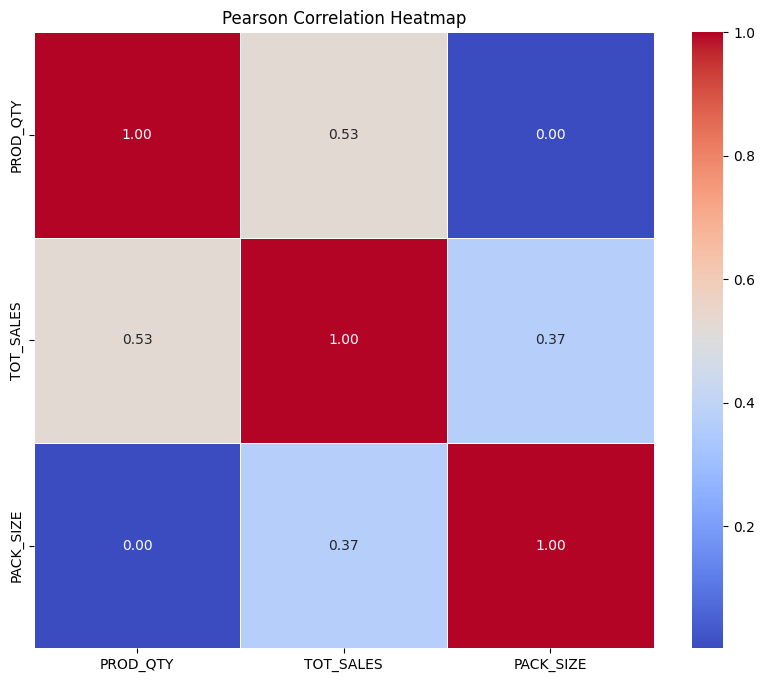

In [103]:
plt.figure(figsize=(10, 8))  # Use plt.figure() for creating a new figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [105]:
sales_store_86 = df[df['STORE_NBR'] == 86]['TOT_SALES']

# Calculate the sum of sales
total_sales_store_86 = sales_store_86.sum()

print("Total sales for Store 86:", total_sales_store_86)

Total sales for Store 86: 10635.35


In [106]:
sales_store_88 = df[df['STORE_NBR']==88]["TOT_SALES"]
total_sales_88 = sales_store_88.sum()
print("sales of store 88", total_sales_88)


sales of store 88 16333.25


In [108]:
sales_store_77 = df[df['STORE_NBR']==77]["TOT_SALES"]
total_sales_77= sales_store_77.sum()
print("sales of store 77", total_sales_77)

sales of store 77 3040.0


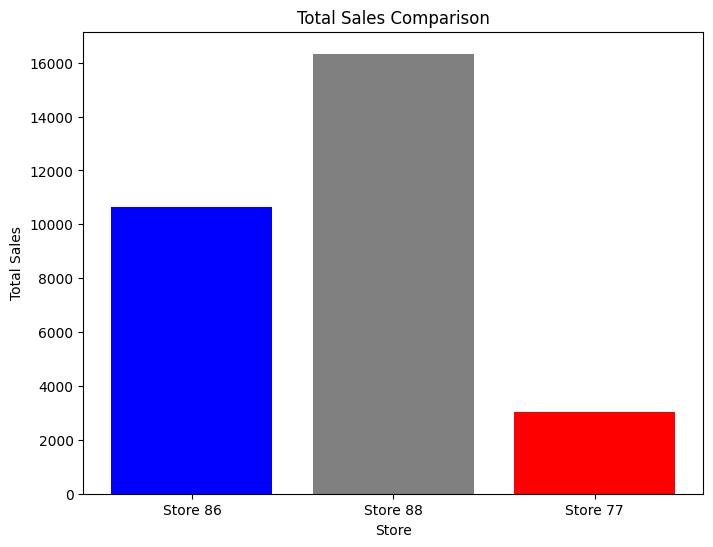

In [110]:
stores = ['Store 86', 'Store 88','Store 77']
total_sales = [total_sales_store_86 ,total_sales_88,total_sales_77]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(stores, total_sales, color=['blue', 'gray','red'])
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Total Sales Comparison')
plt.show()

# The graph shows that among Store 86, 88, and 77, Store 88 has the highest sales.

# Store 86,88 ,77 and other sales

In [111]:
other_stores_sales = df[~df['STORE_NBR'].isin([88, 86, 77])]['TOT_SALES']

total_sales_other_stores = other_stores_sales.sum()

print("Total sales for other stores:", total_sales_other_stores)

Total sales for other stores: 1903106.4000000001


In [113]:
totals_sales_86_88_77 = total_sales_store_86+total_sales_88+total_sales_77

In [114]:
totals_sales_86_88_77

30008.6

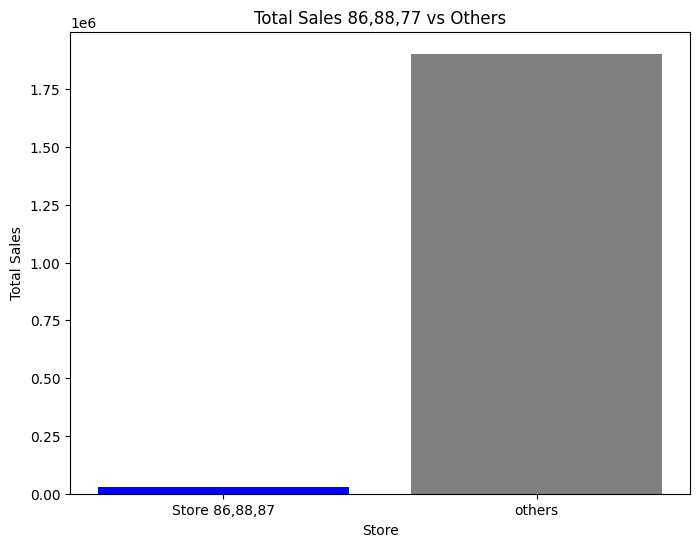

In [115]:
stores1 = ['Store 86,88,87', 'others']
comparision = [totals_sales_86_88_77,total_sales_other_stores]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(stores1, comparision, color=['blue', 'gray','red'])
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Total Sales 86,88,77 vs Others')
plt.show()

In [117]:
Total_no_of_stores = df['STORE_NBR'].nunique()
print(Total_no_of_stores)

272


In [118]:
df["DATE"]

0         2018-10-17
1         2018-09-16
2         2019-03-07
3         2019-03-08
4         2018-11-02
             ...    
264829    2018-12-08
264830    2018-10-01
264831    2018-10-24
264832    2018-10-27
264833    2018-12-14
Name: DATE, Length: 264834, dtype: object

In [120]:
df['DATE'] = pd.to_datetime(df['DATE'])
# Extract the year from the date column
df['YEAR'] = df['DATE'].dt.year

In [122]:
time_period = df['YEAR'].nunique()
print(time_period)

2


In [123]:
year_2018_store_77 = df[(df['YEAR'] == 2018) & (df['STORE_NBR'] == 77)]["TOT_SALES"]


year_2018_totalsales_store_77 = year_2018_store_77.sum()

print("Sales of Store 77 in 2018:", year_2018_totalsales_store_77)

Sales of Store 77 in 2018: 1494.6


In [124]:
year_2019_store_77 = df[(df['YEAR'] == 2019) & (df['STORE_NBR'] == 77)]["TOT_SALES"]


year_2019_totalsales_store_77 = year_2019_store_77.sum()

print("Sales of Store 77 in 2019:", year_2019_totalsales_store_77)

Sales of Store 77 in 2019: 1545.4


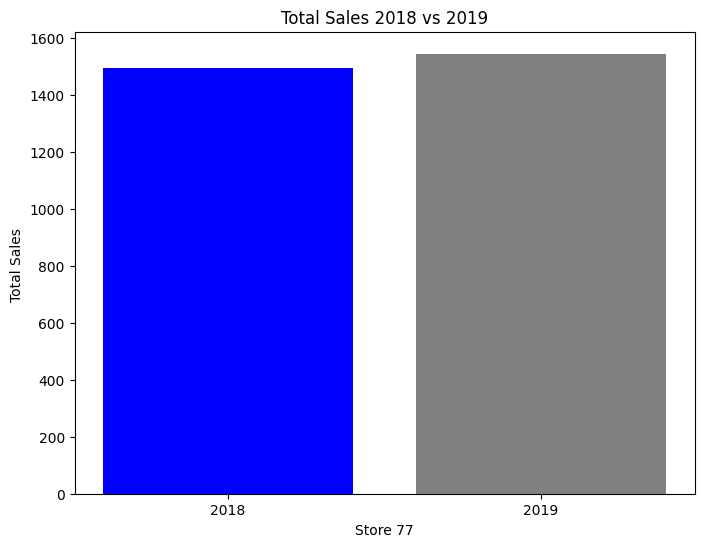

In [126]:
store_77 = ['2018','2019']
sales_2018_2019_77 = [year_2018_totalsales_store_77,year_2019_totalsales_store_77]
plt.figure(figsize=(8, 6))
plt.bar(store_77,sales_2018_2019_77 , color=['blue', 'gray','red'])
plt.xlabel('Store 77')
plt.ylabel('Total Sales ')
plt.title('Total Sales 2018 vs 2019')
plt.show()

In [127]:
difference_2018_2019_store_77 = year_2019_totalsales_store_77 - year_2018_totalsales_store_77
print(difference_2018_2019_store_77)

50.80000000000018


# This shows that total sales of store 77 in 2019 increases by 50.8 than what it was in  2018.

# Sales pattern analysis of store 88


In [129]:
year_2018_store_88 = df[(df['YEAR'] == 2018) & (df['STORE_NBR'] == 88)]["TOT_SALES"]


year_2018_totalsales_store_88 = year_2018_store_88.sum()

print("Sales of Store 88 in 2018:", year_2018_totalsales_store_88)

Sales of Store 88 in 2018: 8117.200000000001


In [131]:
year_2019_store_88 = df[(df['YEAR'] == 2019) & (df['STORE_NBR'] == 88)]["TOT_SALES"]


year_2019_totalsales_store_88 = year_2019_store_88.sum()

print("Sales of Store 88 in 2019:", year_2019_totalsales_store_88)

Sales of Store 88 in 2019: 8216.05


In [132]:
difference_2018_2019_store_88 = year_2019_totalsales_store_88 - year_2018_totalsales_store_88
print(difference_2018_2019_store_88)

98.84999999999854


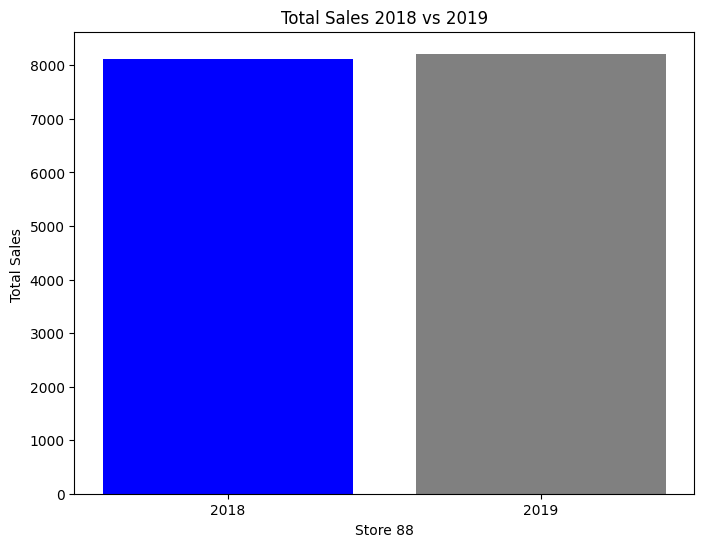

In [137]:
store_88 = ['2018','2019']
sales_2018_2019_88 = [year_2018_totalsales_store_88,year_2019_totalsales_store_88]
plt.figure(figsize=(8, 6))
plt.bar(store_88,sales_2018_2019_88 , color=['blue', 'gray','red'])
plt.xlabel('Store 88')
plt.ylabel('Total Sales ')
plt.title('Total Sales 2018 vs 2019')
plt.show()

# This shows that total sales of store 88 in 2019 increases by 98.84 than what it was in 2018.

# Sales Analysis of store 86

In [134]:
year_2018_store_86 = df[(df['YEAR'] == 2018) & (df['STORE_NBR'] == 86)]["TOT_SALES"]


year_2018_totalsales_store_86 = year_2018_store_86.sum()

print("Sales of Store 86 in 2018:", year_2018_totalsales_store_86)

Sales of Store 86 in 2018: 5278.45


In [135]:
year_2019_store_86 = df[(df['YEAR'] == 2019) & (df['STORE_NBR'] == 86)]["TOT_SALES"]


year_2019_totalsales_store_86 = year_2019_store_86.sum()

print("Sales of Store 86 in 2019:", year_2019_totalsales_store_86)

Sales of Store 86 in 2019: 5356.9


In [136]:
difference_2018_2019_store_86 = year_2019_totalsales_store_86 - year_2018_totalsales_store_86
print(difference_2018_2019_store_86)

78.44999999999982


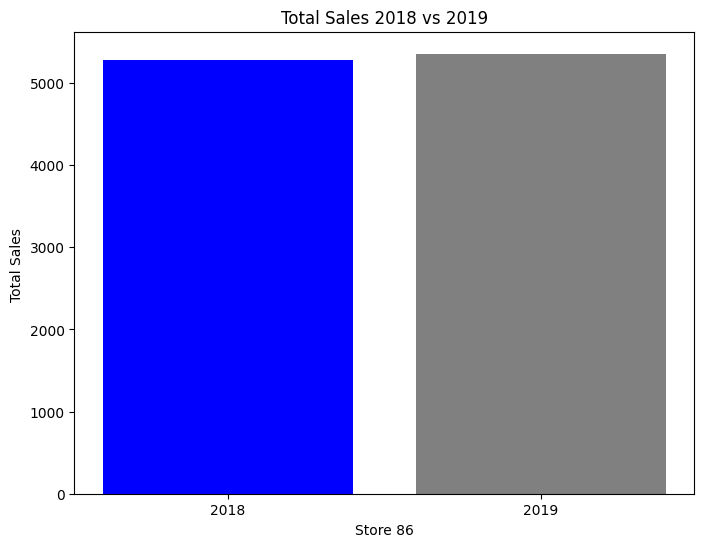

In [138]:
store_86 = ['2018','2019']
sales_2018_2019_86 = [year_2018_totalsales_store_86,year_2019_totalsales_store_86]
plt.figure(figsize=(8, 6))
plt.bar(store_86,sales_2018_2019_86 , color=['blue', 'gray','red'])
plt.xlabel('Store 86')
plt.ylabel('Total Sales ')
plt.title('Total Sales 2018 vs 2019')
plt.show()

# This shows that total sales of store 88 in 2019 increases by 78.4 than what it was in 2018.

ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

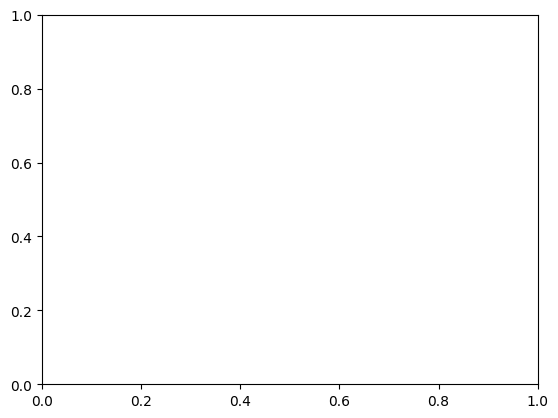

In [139]:
x = [1, 2, 3, 4, ]  # X-axis values
y = [10, 15, 7, 10, 20]  # Y-axis values

# Plot the line chart with custom parameters
plt.plot(x, y, color='green', linestyle='dashed', marker='o')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Chart Example')

# Display the plot
plt.show()